<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Simple AutoEncoders with Image Data </h2> </html>

Here is a simple autoencoder with just the dense layers.


Load the data and import the libraries.

In [1]:
# Your code to import matplotlib, pandas and numpy libraries

#
#
#
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

_______________________![image.png](attachment:a4e07154-e766-4e74-a203-c09e7605ea7b.png)

In [2]:
import tensorflow as tf
from tensorflow import keras

__________________![image.png](attachment:06d151d2-f461-411d-8325-a4a6287cfd48.png)

In [3]:
print(tf.__version__)

2.18.0


____________________![image.png](attachment:3ff556fc-1f76-4be4-a216-1e8aecd11e54.png)

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist

In [5]:
# Your code to load MNIST data and store it in variables x_train, x_test.
# Note -  we do not need labels as it's autoencoder.

#
(x_train, _), (x_test,_) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


______________________![image.png](attachment:74823cdf-09eb-4a7a-8a39-8c306d6de031.png)

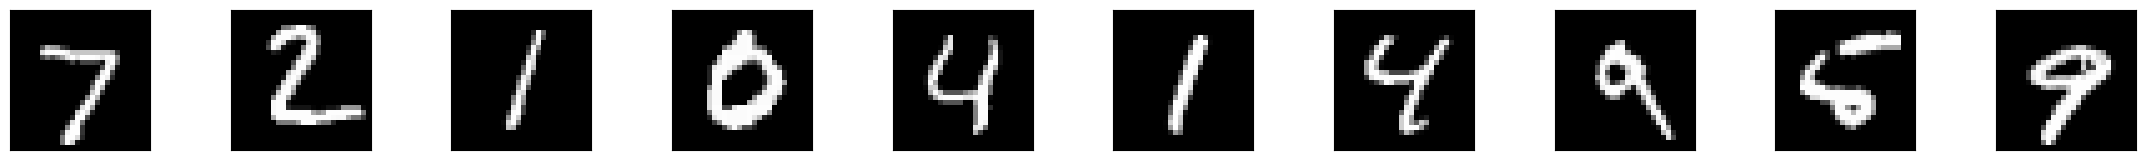

In [6]:
%matplotlib inline

n=10
plt.figure(figsize=(28, 4))
for i in range(n):
    ax = plt.subplot(2, n, i +1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
# Your code to
# normalise train data - Divided by 255
x_train = x_train /255
#

# normalise test data - Divided by 255
x_test = x_test / 255
#


<html> <h3 style="font-style:italic; color:blue;"> Basic AutoEncoder : </h3> </html>

Build a basic symmetric encoder-decoder network that recreates the image.  
This network could be used in dimensionaliry reduction or feature learning.


________________________![image.png](attachment:de80ae8e-d8d5-4cfc-a51b-a2f7d50dc7c2.png)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add as many layers in the Encoder network of your choice
encoder.add(Dense(500,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
#
#
#
#

# The last TWO layers of the Encoder and Decoder must be matched (see the following decoder cell)

#
#


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Your code to print your Encoder model

#
print(encoder.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 793,500 (3.03 MB)

 Trainable params: 793,500 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
# Your OWN Encoder model should be printed here


# Please do not copy the model below

In [12]:
decoder = Sequential()
decoder.add(Dense(200,input_shape=[100],activation='relu'))

# Add as many layers in the Decoder as you want.
# Reember - Encoder and Decoder must be symmetric.
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(500,activation='relu'))
#
#
#


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28,28]))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Your code to print the Decoder model

#
print(decoder.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       392,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 794,184 (3.03 MB)

 Trainable params: 794,184 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Your OWN Decoder model should be printed here
# Please do not copy the model below

____________________![image.png](attachment:a94c2e5b-e27d-4e12-84c9-116a2f70e393.png)

In [15]:

autoencoder = Sequential([encoder, decoder])

In [16]:
# Your code to print the Autoencoder model
autoencoder.summary()
#

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 100)            │       793,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │       794,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,587,684 (6.06 MB)

 Trainable params: 1,587,684 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Your OWN Autoencoder model should be printed here
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 100)            │       793,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │       794,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,587,684 (6.06 MB)

 Trainable params: 1,587,684 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#SGD?

In [19]:
# Your code to compile the Autoencoder.
# Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(
    loss='binary_crossentropy',  # Loss function
    optimizer='adam',            # Optimizer (default choice)
    metrics=['accuracy']

)
#


___________________![image.png](attachment:c8684fc7-fcb0-48bf-87e8-f70857a0fc4e.png)

In [20]:
history = autoencoder.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 26ms/step - accuracy: 0.1472 - loss: 0.2037 - val_accuracy: 0.2275 - val_loss: 0.1330
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.2380 - loss: 0.1289 - val_accuracy: 0.2461 - val_loss: 0.1198
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.2529 - loss: 0.1182 - val_accuracy: 0.2555 - val_loss: 0.1126
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.2605 - loss: 0.1126 - val_accuracy: 0.2633 - val_loss: 0.1108
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.2652 - loss: 0.1098 - val_accuracy: 0.2639 - val_loss: 0.1085
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.2691 - loss: 0.1075 - val_accuracy: 0.2595 - val_loss: 0.1074
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.2727 - loss: 0.1056 - val_accuracy: 0.2684 - val_loss: 0.1061
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 28ms/step - accuracy: 0.2755 -

____________________![image.png](attachment:30a3bc58-49bd-4849-8c76-e2551d3a033b.png)

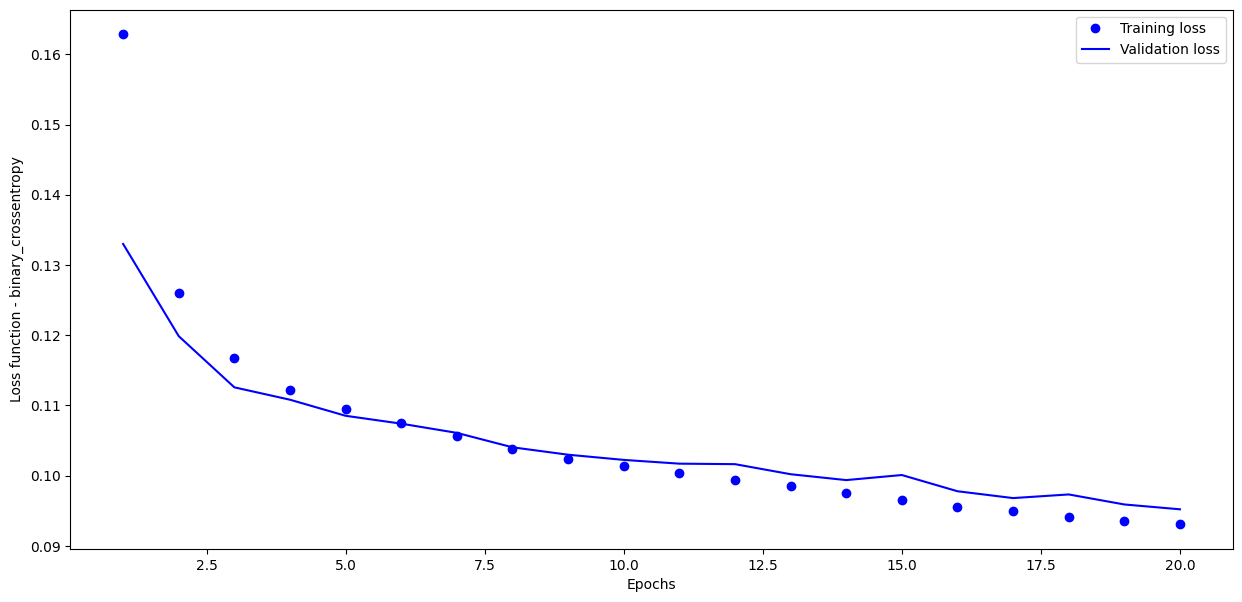

In [21]:
losses = history.history['loss']
val_losses = history.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

___________________![image.png](attachment:b2f19fbc-57fa-40f7-80a1-336642829de1.png)

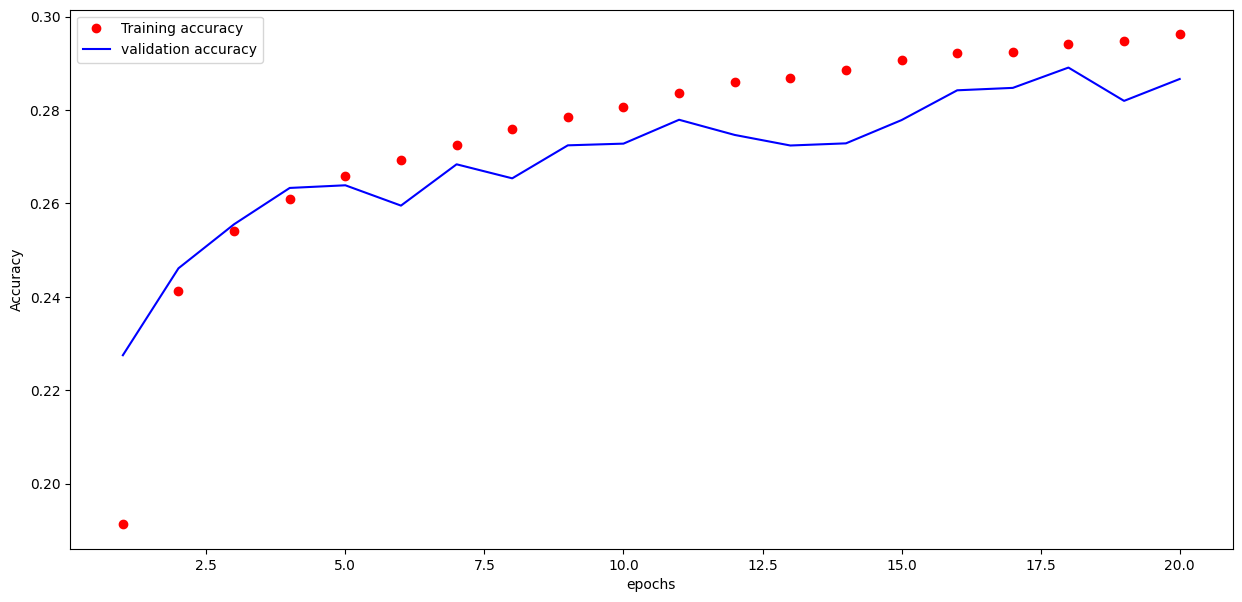

In [22]:
accuracy_array = history.history['accuracy']
val_accuracy_array = history.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy_array,'b', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

_______________________![image.png](attachment:39f152ac-8692-403f-a1c4-3a71fe4fd978.png)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


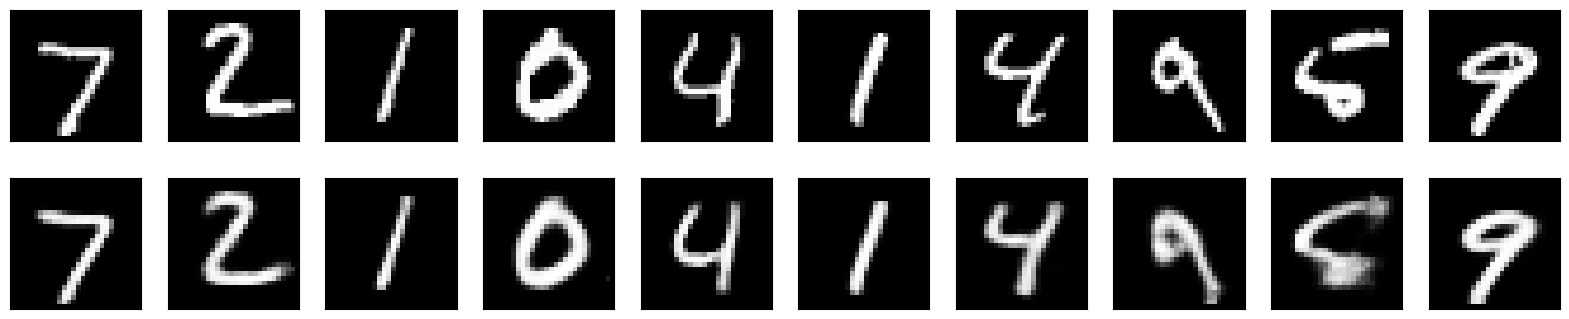

In [23]:
decoded_imgs = autoencoder.predict(x_test)

n=10

plt.figure(figsize=(20, 4))

for i in range(n):

    ax= plt.subplot(2, n, i +1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

<html> <h3 style="font-style:italic; color:blue;"> AutoEncoders for Denoising Images : </h3> </html>

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples.


______________________![image.png](attachment:66c883c0-27ea-473a-bfbf-adf60d8af39f.png)

In [24]:
from tensorflow.keras.layers import GaussianNoise

In [25]:
#GaussianNoise?

___________________![image.png](attachment:daef4479-63f7-4a6a-9927-be13f2230632.png)

In [26]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

In [27]:
# Plot the original and noisy images
print(sample)

<GaussianNoise name=gaussian_noise, built=True>


_______________________![image.png](attachment:4013cb09-7c0a-4cc7-b208-31bda1d0f668.png)

In [28]:
x_test[0].size

784

____________________![image.png](attachment:2e2bac52-3120-4879-9117-f71bdf1ac965.png)

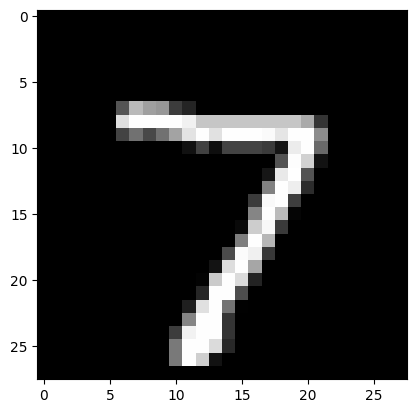

In [29]:
plt.imshow(x_test[0])
plt.show()

_____________________![image.png](attachment:003958e0-35f7-4d32-8faf-b9486b5d206f.png)

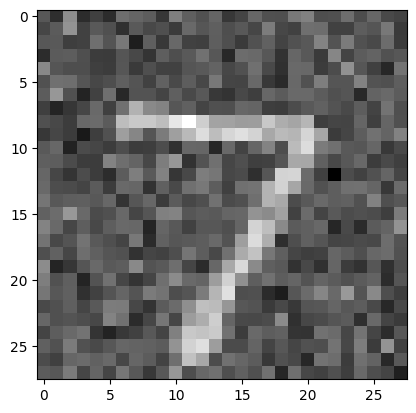

In [30]:
plt.imshow(noisey[0])
plt.show()

_________![image.png](attachment:dd745f81-2f9e-4b45-b030-3a4529ea6f1d.png)

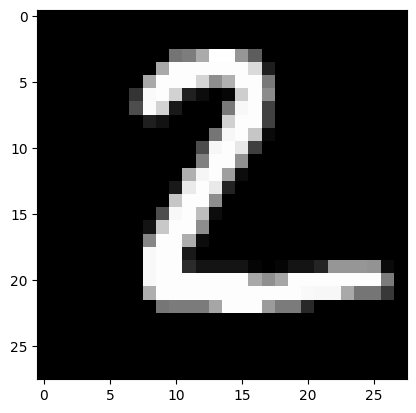

In [31]:
plt.imshow(x_test[1])
plt.show()

______________________![image.png](attachment:cf4f913b-10d4-47b9-9d91-b22fd1c175fa.png)

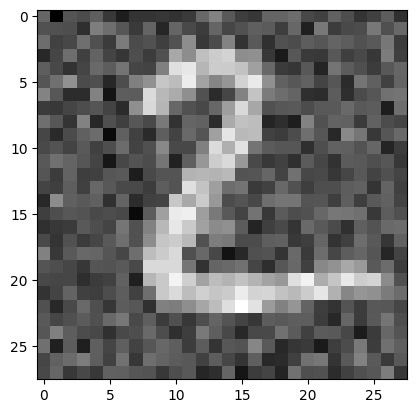

In [32]:
plt.imshow(noisey[1])
plt.show()

<html> <h4 style="font-style:italic; color:blue;"> Create a noise removal autoencoder and train it </h4> </html>

- Again similar to above it is a symmetric dense network.
- Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs.


### Input - Images with noise
### Labels - Clean images.


In [33]:
# Encoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy images

# Add layers of Encoder network. You could use the same number of layers as you created earlier
encoder.add(Dense(500,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
#
#
#
#

print(encoder.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 784)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 793,500 (3.03 MB)

 Trainable params: 793,500 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
# Your OWN Encoder model should be printed here
# Please do not copy the model below

In [35]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[100],activation='relu'))

# Add layers of the Decoder network. You could use the same number of layers as you created earlier
# Reember - Encoder and Decoder must be symmetric
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(500,activation='relu'))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(100,activation="relu"))
#
#
#


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

print(decoder.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 784)            │        79,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 540,734 (2.06 MB)

 Trainable params: 540,734 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
# Your OWN Decoder model should be printed here
# Please do not copy the model below

_________________________![image.png](attachment:b8742807-43dd-41a1-a461-c2a4455e6d07.png)

In [37]:
noise_remover = Sequential([encoder, decoder])

In [38]:
# Your code to print the Autoencoder model

#

In [39]:
# Your OWN Autoencoder model should be printed here

In [40]:
# Your code to compile the 'noise_remover' model with the same parameters as earlier
noise_remover.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
# noise_remover.compile( ................  )


In [41]:
# Your code to fit 'noise_remover' model with the same parameters as earlier

# history_2 = ..........................
history = noise_remover.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.1144 - loss: 0.2430 - val_accuracy: 0.1969 - val_loss: 0.1598
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.2000 - loss: 0.1571 - val_accuracy: 0.2142 - val_loss: 0.1458
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.2146 - loss: 0.1459 - val_accuracy: 0.2210 - val_loss: 0.1402
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.2248 - loss: 0.1392 - val_accuracy: 0.2293 - val_loss: 0.1327
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.2341 - loss: 0.1339 - val_accuracy: 0.2320 - val_loss: 0.1296
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.2387 - loss: 0.1306 - val_accuracy: 0.2382 - val_loss: 0.1256
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.2427 - loss: 0.1275 - val_accuracy: 0.2470 - val_loss: 0.1245
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.2444 -

In [42]:
# Hint: Use (copy and modify) the code from the cells above

___________________![image.png](attachment:05682556-9ec1-46c6-85d5-3db97ba3c04f.png)

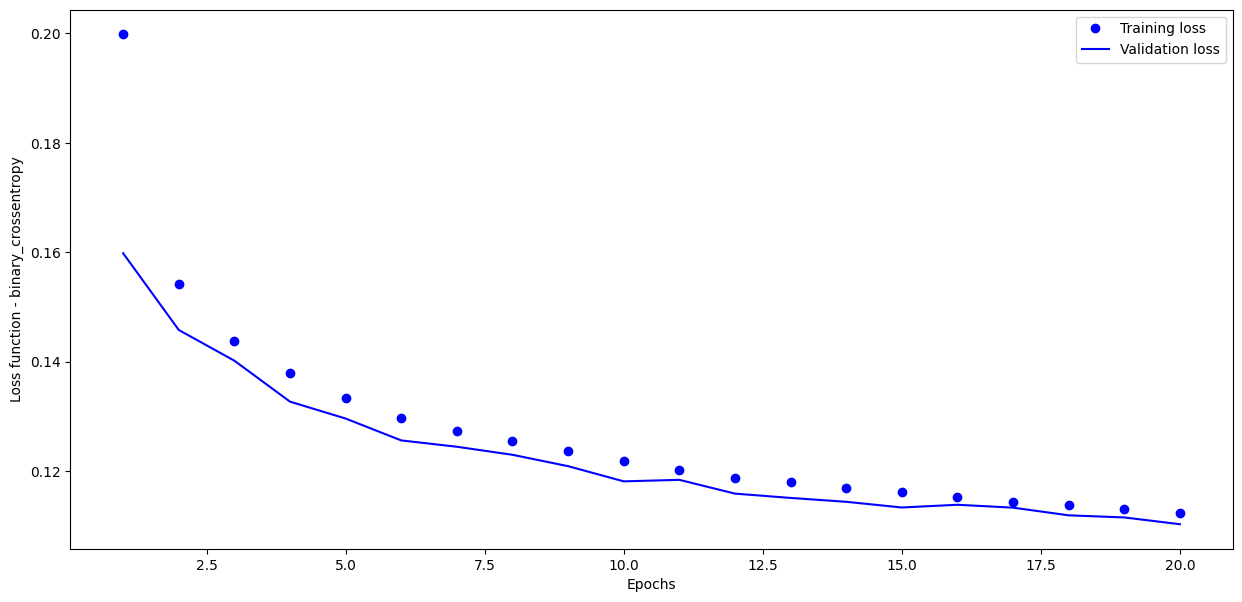

In [43]:
losses = history.history['loss']
losses_val =history.history['val_loss']
epochs=range(1, len(accuracy_array) +1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

___________________________![image.png](attachment:43697532-dcb7-41bf-a1fa-6f630f5d4a29.png)

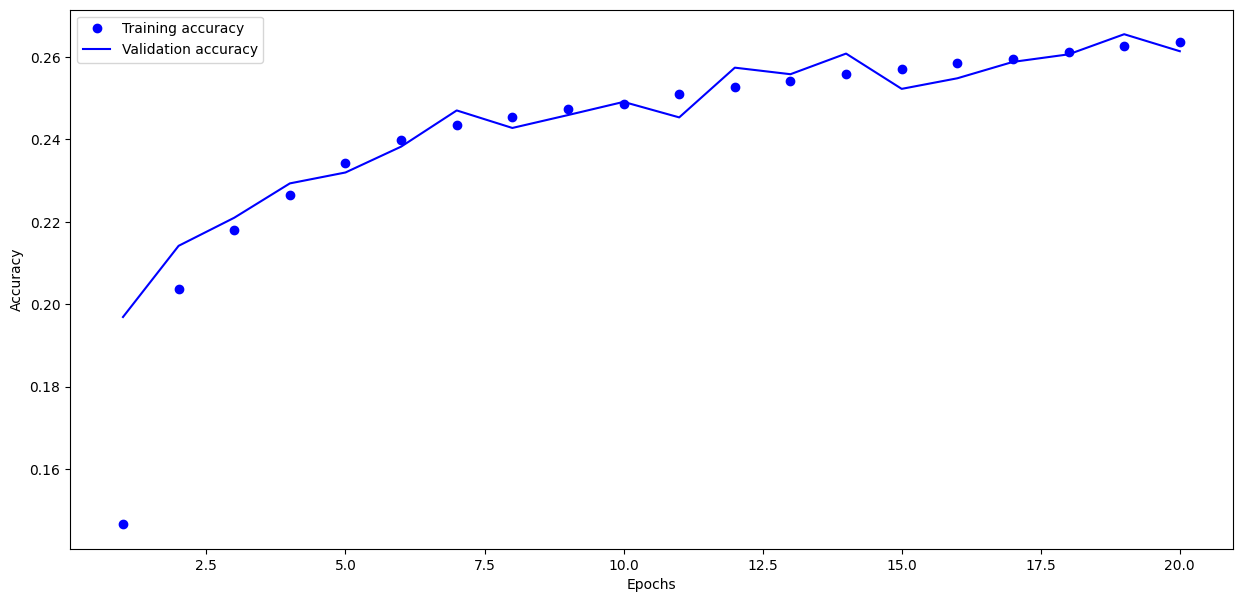

In [44]:
accuracy_array = history.history['accuracy']
val_accuracy_array=history.history['val_accuracy']
epochs=range(1, len(accuracy_array) +1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

______________________![image.png](attachment:9dbf1489-73d6-4480-adc7-0ced14e0c9dd.png)

In [45]:
hundred_noisey_images = sample(x_test[0:100], training=True)
denoised = noise_remover(hundred_noisey_images[0:100])

______________________![image.png](attachment:a5bc2008-bc25-45e7-97ba-ae44dffae6ed.png)

In [46]:
import random

_______![image.png](attachment:505ed502-6fd8-4f58-a27f-44a804f20493.png)

52
The Original


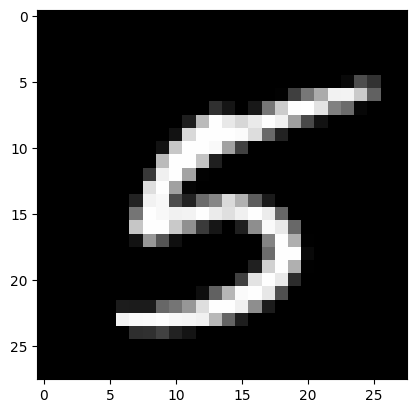

The Noisey Version


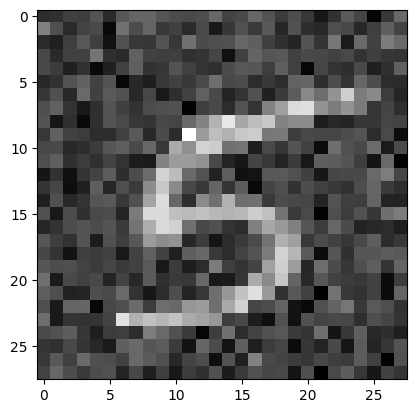

After going through denoiser


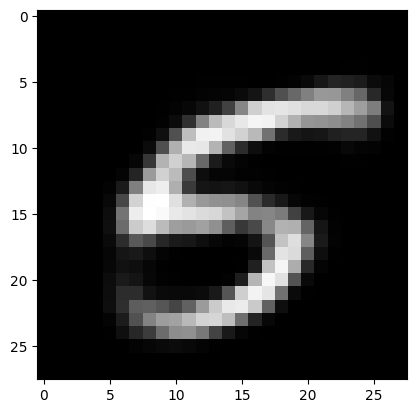

In [47]:
n=random.randint(0,100)
print(n)
print("The Original")
plt.imshow(x_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(hundred_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

 - Put the Encoder, Decoder and Basic Autoencoder models using summary() in your lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present. Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.